# TEAM 3 Validation

This notebook provides the workflow within all the steps to validate the TEAM 3 algorithm for (Privacy) Threat Modelling.

#### Setup

Run the following cells before starting with your validation.

*Remember to install dependencies only once, so just comment the cell after executed. On the other hand, module imports need to be done on each run.*

In [ ]:
#!pip install -r requirements.txt

In [1]:
import os
import pandas as pd
from itables import init_notebook_mode

from embracing_utils import compute_semantic_similarity_scores, compute_semantic_similarity_scores_between_files

init_notebook_mode(all_interactive=True)

[nltk_data] Downloading package wordnet to /Users/mario/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<IPython.core.display.Javascript object>

## Compute Semantic Similarity Scores

### Tool

In [ ]:
preliminary_threat_list_path = f'./data/validation/tool_final_threats.csv'
#tool_min_score, tool_max_score = compute_semantic_similarity_scores(preliminary_threat_list_path, f'./data/tool_final_threats_ss_scores.csv')

In [8]:
ss_scores_df = pd.read_csv(f'./data/validation/tool_final_threats_semantic_similarity_scores.csv')
if 'tool_min_score' not in globals() or 'tool_max_score' not in globals():
    tool_min_score, tool_max_score = ss_scores_df['score'].round(2).min(), ss_scores_df['score'].round(2).max()
ss_scores_df

sentence1   
0                               Abuse of authorisations  \
1                               Abuse of authorisations   
2                               Abuse of authorisations   
3                               Abuse of authorisations   
4                               Abuse of authorisations   
...                                                 ...   
1270                  USB vulnerabilitiies exploitation   
1271                  USB vulnerabilitiies exploitation   
1272  Using information and/or devices from an unrel...   
1273  Using information and/or devices from an unrel...   
1274                              V2X Denial of Service   

                                              sentence2     score  
0     Arbitrary code execution on telematics unit (TCU)  0.321599  
1                                      CAN bus flooding  0.218642  
2                                   CAN frame injection  0.225182  
3                                   CAN frame tampering  0.465652  
4                                             Car theft  0.222073  
...                                                 ...       ...  
1270                              V2X Denial of Service  0.159748  
1271                                      Weak password  0.384971  
1272                              V2X Denial of Service  0.097142  
1273                                      Weak password  0.235570  
1274                                      Weak password  0.093564  

[1275 rows x 3 columns]

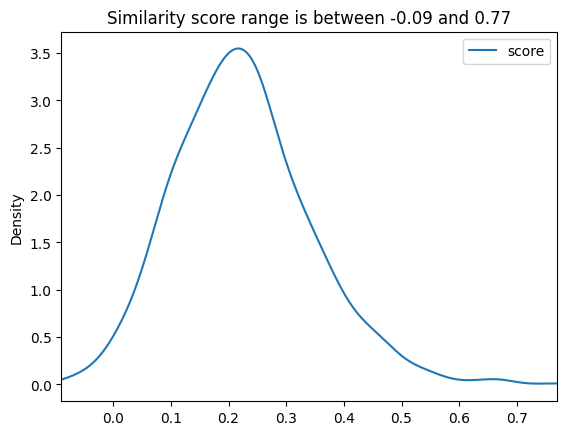

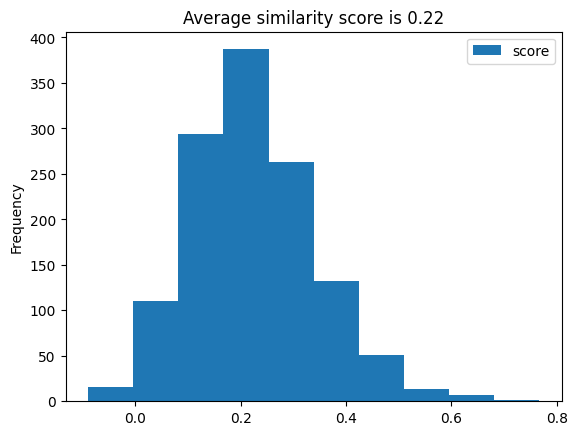

In [9]:
density_plot = ss_scores_df.plot.density(title=f'Similarity score range is between {tool_min_score} and {tool_max_score}')
density_plot.set_xlim(tool_min_score, tool_max_score)
hist_plot = ss_scores_df.plot.hist(title=f'Average similarity score is {ss_scores_df["score"].mean().round(2)}')

### Validator

In [ ]:
preliminary_threat_list_path = f'./data/validation/vehits_final_threats.csv'
#validator_min_score, validator_max_score = compute_semantic_similarity_scores(preliminary_threat_list_path, f'./data/vehits_final_threats_ss_scores.csv')

In [10]:
ss_scores_df = pd.read_csv(f'./data/validation/vehits_final_threats_semantic_similarity_scores.csv')
if 'validator_min_score' not in globals() or 'validator_max_score' not in globals():
    validator_min_score, validator_max_score = ss_scores_df['score'].round(2).min(), ss_scores_df['score'].round(2).max()
ss_scores_df

sentence1   
0     Abuse of authorisations in OEM and/or car serv...  \
1     Abuse of authorisations in OEM and/or car serv...   
2     Abuse of authorisations in OEM and/or car serv...   
3     Abuse of authorisations in OEM and/or car serv...   
4     Abuse of authorisations in OEM and/or car serv...   
...                                                 ...   
1535  Operator-sided data leakage in OEM and/or car ...   
1536  Operator-sided data leakage in OEM and/or car ...   
1537                       Secondary use of driver data   
1538                       Secondary use of driver data   
1539  Sharing, transfer or processing through 3rd pa...   

                                              sentence2     score  
0                                      CAN bus flooding  0.273944  
1                                     CAN eavesdropping  0.298504  
2                                   CAN frame injection  0.248633  
3                                   CAN frame tampering  0.331596  
4        Change of data or car components configuration  0.341898  
...                                                 ...       ...  
1535  Sharing, transfer or processing through 3rd pa...  0.452184  
1536  Software vulnerabilities exploitation in OEM a...  0.745127  
1537  Sharing, transfer or processing through 3rd pa...  0.412554  
1538  Software vulnerabilities exploitation in OEM a...  0.387840  
1539  Software vulnerabilities exploitation in OEM a...  0.366455  

[1540 rows x 3 columns]

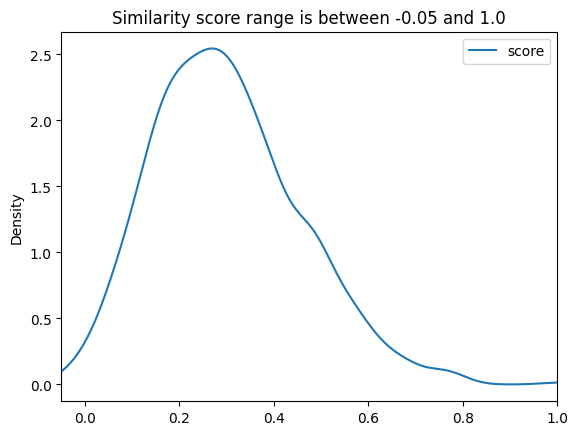

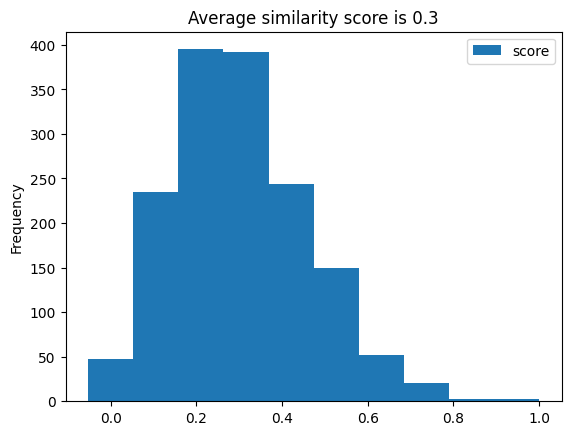

In [11]:
density_plot = ss_scores_df.plot.density(title=f'Similarity score range is between {validator_min_score} and {validator_max_score}')
density_plot.set_xlim(validator_min_score, validator_max_score)
hist_plot = ss_scores_df.plot.hist(title=f'Average similarity score is {ss_scores_df["score"].mean().round(2)}')

## Compute Semantic Similarity Scores for Validation

The following code computes the semantic similarity scores between each final threat from the automated list with each threat from the validation list. Then, the maximum value is considered as a metrics of comparison.

In [2]:
tool_output_path = f'./data/validation/tool_final_threats.csv'
validator_source_output_path = f'./data/validation/vehits_final_threats.csv'
output_comparison_ss_scores_path = f'./data/validation/comparison_ss_scores.csv'
min_score, max_score = compute_semantic_similarity_scores_between_files(tool_output_path, validator_source_output_path, output_comparison_ss_scores_path)

### Comparison Stats


In [4]:
ss_scores_df = pd.read_csv(f'./data/validation/comparison_ss_scores.csv')
if 'min_score' not in globals() or 'max_score' not in globals():
    min_score, max_score = ss_scores_df['score'].round(2).min(), ss_scores_df['score'].round(2).max()
ss_scores_df

sentence1     score
0                             Abuse of authorisations  0.639812
1   Arbitrary code execution on telematics unit (TCU)  0.470093
2                                    CAN bus flooding  1.000000
3                                 CAN frame injection  1.000000
4                                 CAN frame tampering  1.000000
5                                           Car theft  0.920327
6      Change of data or car components configuration  1.000000
7                          Collection without consent  0.488360
8   Communication eavesdropping in vehicle components  0.674895
9     Communication protocol and/or session hijacking  0.655702
10  Consent on everything / Problems with getting ...  0.500427
11  Data aggregation and profiling of the driver a...  0.932409
12                                          Data loss  0.531704
13                                        Data replay  0.452096
14                                  ECU firmware dump  1.000000
15                                        ECU reflash  1.000000
16                   Failure or disruption of service  0.463022
17        Failure or malfunction of a sensor/actuator  0.537539
18           Failure to meet contractual requirements  0.822496
19                           Form field design issues  0.326145
20                                       GPS spoofing  1.000000
21                           Identity theft of driver  1.000000
22                               Infotainment malware  1.000000
23    Infotainment reverse engineering and alteration  0.939195
24  Insecure data transfer in OEM and/or car services  1.000000
25                                     Insider threat  0.446780
26         Insufficient data breach response from OEM  1.000000
27               Insufficient deletion of driver data  1.000000
28                                Loss of GNSS signal  1.000000
29  Manipulation of physical sensors, memories and...  0.435282
30             Misleading information in OEM services  0.956126
31         Missing or insufficient session expiration  0.496874
32                                     Network outage  0.449481
33                               OEM targeted attacks  1.000000
34  Operator-sided data leakage in OEM and/or car ...  1.000000
35            Remote access via telematics unit (TCU)  0.424507
36                                Rogue OBD-II Device  0.463095
37                                      Secondary use  0.659078
38                                   Server violation  0.636464
39  Sharing, transfer or processing through 3rd pa...  1.000000
40                               Side-channel attacks  0.648509
41                               Smart key compromise  0.413453
42                   SS7 vulnerabilities exploitation  0.373772
43      Tampering with telematics unit (TCU) firmware  0.523847
44               Threats targeting autonomous sensors  1.000000
45                     Unauthorised diagnostic access  0.518557
46  Unauthorised violation of rules and regulation...  0.820287
47                  USB vulnerabilitiies exploitation  0.462002
48  Using information and/or devices from an unrel...  0.644788
49                              V2X Denial of Service  1.000000
50                                      Weak password  0.439192

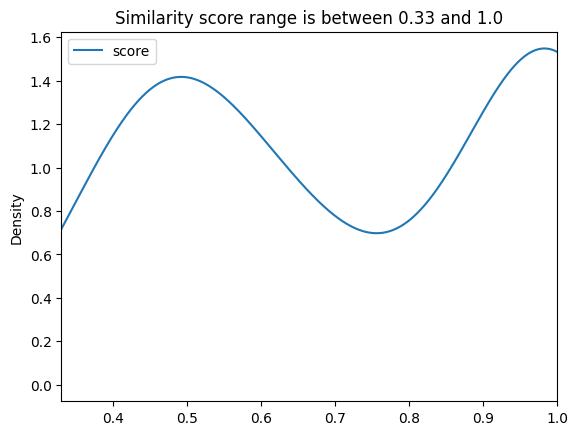

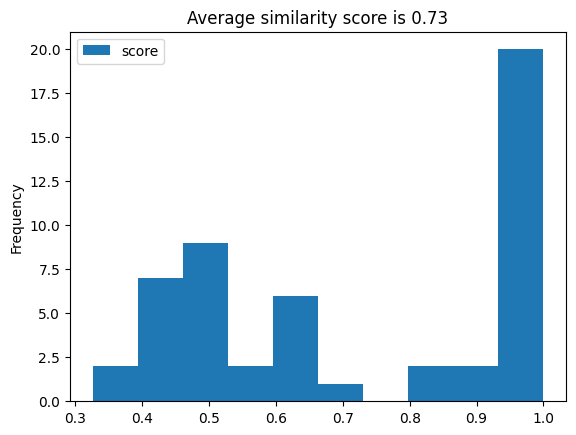

In [5]:
density_plot = ss_scores_df.plot.density(title=f'Similarity score range is between {min_score} and {max_score}')
density_plot.set_xlim(min_score, max_score)
hist_plot = ss_scores_df.plot.hist(title=f'Average similarity score is {ss_scores_df["score"].mean().round(2)}')


#### Removing Exact Matches

In [6]:
filtered_df = ss_scores_df.loc[ss_scores_df['score'] <= 0.999999]
filtered_df

sentence1     score
0                             Abuse of authorisations  0.639812
1   Arbitrary code execution on telematics unit (TCU)  0.470093
5                                           Car theft  0.920327
7                          Collection without consent  0.488360
8   Communication eavesdropping in vehicle components  0.674895
9     Communication protocol and/or session hijacking  0.655702
10  Consent on everything / Problems with getting ...  0.500427
11  Data aggregation and profiling of the driver a...  0.932409
12                                          Data loss  0.531704
13                                        Data replay  0.452096
16                   Failure or disruption of service  0.463022
17        Failure or malfunction of a sensor/actuator  0.537539
18           Failure to meet contractual requirements  0.822496
19                           Form field design issues  0.326145
23    Infotainment reverse engineering and alteration  0.939195
25                                     Insider threat  0.446780
29  Manipulation of physical sensors, memories and...  0.435282
30             Misleading information in OEM services  0.956126
31         Missing or insufficient session expiration  0.496874
32                                     Network outage  0.449481
35            Remote access via telematics unit (TCU)  0.424507
36                                Rogue OBD-II Device  0.463095
37                                      Secondary use  0.659078
38                                   Server violation  0.636464
40                               Side-channel attacks  0.648509
41                               Smart key compromise  0.413453
42                   SS7 vulnerabilities exploitation  0.373772
43      Tampering with telematics unit (TCU) firmware  0.523847
45                     Unauthorised diagnostic access  0.518557
46  Unauthorised violation of rules and regulation...  0.820287
47                  USB vulnerabilitiies exploitation  0.462002
48  Using information and/or devices from an unrel...  0.644788
50                                      Weak password  0.439192

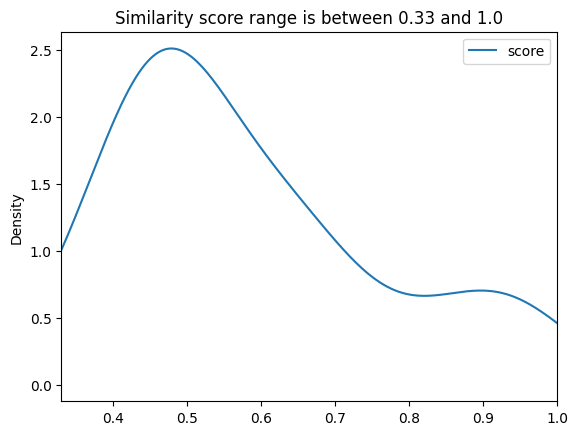

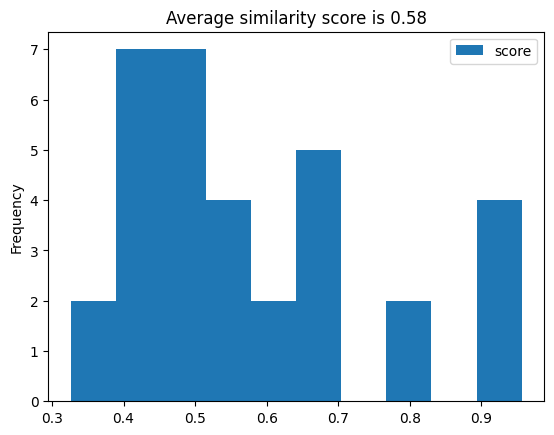

In [7]:
density_plot = filtered_df.plot.density(title=f'Similarity score range is between {min_score} and {max_score}')
density_plot.set_xlim(min_score, max_score)
hist_plot = filtered_df.plot.hist(title=f'Average similarity score is {filtered_df["score"].mean().round(2)}')